<img src="Figurer/NTNU_Logo.png" align="left">
<br clear="all">

<br>

# Programmeringsmodul Forelesning 2: <br>  Beregninger og Funksjoner


* Emne INGA1002 - Programmering, Numerikk og Sikkerhet
* Onsdag 28. August 2024
* Underviser: Kai Erik Hoff


<br><br>

# Tema
* Funksjoner som konsept
* Innebygde funksjoner
* Matematiske funksjoner og muduler
* Egendefinerte funksjoner
* Intro til lister og arrays

# Funksjoner

<div style="width: 100%;">
    <img src="Figurer/funksjons_forklaring.png" style="float: right; width: 35%" />
    <div style="width: 65%">
    <br>
      <h3>I matematikk:</h3>
        <ul><li>Tar imot en input-verdi $x$</li>
        <li>"mapper" $x$ til en utgangsverdi $y = f(x)$</li></ul>
      <h3>I programmering:</h3>
        <ul><li>Tar imot data inn, som f.eks. et tall <b>x</b></li>
        <li>Utfører en rekke handlinger med dataen</li>
        <li>Returnerer data ut, som f.eks. et nytt tall <b>y</b> </li></ul>
    </div>
</div> 

# Funksjoner vs. variabler

* *Variabler* gjør det mulig å ta vare på *data* som vi "har bruk for" senere i programmet.
    * Vi bruker navnet til variabelen til å referere til den aktuelle dataen.

In [1]:
mitt_navn = "Kai Erik"
print(f"Navnet lagret i variabelen 'mitt_navn' er: {mitt_navn}")

Navnet lagret i variabelen 'mitt_navn' er: Kai Erik


* *Funksjoner* gjør det mulig å samle et sett med instrukser, og lagre de til senere bruk.
    * Vi *kaller* på funksjonen når vi vil at disse instruksene skal utføres.

### Eksempel/analogi: Vaskemaskin
     
<div style="width: 100%;">
    <img src="Figurer/vaskemaskin.png" style="float: right; width: 35%" />
    <div style="width: 65%">
    <br>
    <ul>
      <li>Navn:</li>
        <ul><li>Vaskemaskin</li></ul>
      <li>Data inn:</li>
        <ul><li>Skitne klær</li>
        <li>Vaskepulver</li>
        <li>Vann</li>
        <li>Strøm</li></ul>
      <li>Prosess:</li>
        <ul><li>Vask</li>
            <li>Skyll</li>
            <li>Sentrifuger</li></ul>
        <li>Data ut:</li>
        <ul><li>Rene klær</li></ul>
    </ul>  
    </div>
</div> 

## Basisfunksjoner

<div style="width: 100%;">
<img src="Figurer/Function_illustration.png" style="float: right; width: 40%" />
    <div style="width: 50%">
    <br>
    <ul>
      <li>Funksjoner kan anses som små sub-program som settes til verks fra andre deler av koden.</li>
        <li>Funksjoner har et <i>navn</i>, bruker ofte <i>argument</i>, og kan ha en <i>returverdi</i>.</li>
        <li>Funksjonen <b>round()</b> vil f.eks. ta inn et tall som skal avrundes som <i>argument</i>, og returnere det avrundede tallet.</li>
    </ul>  
    </div>
</div> 

### [Oversikt over innebygde basisfunksjoner](https://docs.python.org/3/library/functions.html)

In [2]:
x = 2/3
round(x, 5)

0.66667

## Noen utvalgte basisfunksjoner

In [3]:
abs(-5)

5

In [4]:
print("Hallo verden")

Hallo verden


In [35]:
round(10/3, 3)

3.333

In [6]:
help(round)

Help on built-in function round in module builtins:

round(number, ndigits=None)
    Round a number to a given precision in decimal digits.
    
    The return value is an integer if ndigits is omitted or None.  Otherwise
    the return value has the same type as the number.  ndigits may be negative.



# Matematiske funksjoner
* For å utføre matematiske regneoperasjoner som $\sqrt{x}$, $\cos(x)$, $\sin(x)$ osv. trenger de å importeres fra en ***modul***
* Kan hentes fra f.eks. modulen [`numpy`](https://numpy.org/doc/stable/user/quickstart.html) ved å bruke nøkkelordet `import`

In [7]:
import numpy
numpy.sqrt(9)

np.float64(3.0)

In [8]:
import numpy as np
np.sqrt(9)

np.float64(3.0)

In [9]:
from numpy import sqrt, pi, cos, sin
sqrt(9)

np.float64(3.0)

## Eksempeloppgave: skrått kast uten luftmotstand

<img src="Figurer/skratt_kast.png" style="align: left; width: 35%" />

####  Oppgave: Hvor langt flyr ballen før den lander på bakken?

(sidestilt med 4c: skiløperoppgaven i kompleksitet)

## Løsningsmetode beskrevet matematisk

* Kjente parametre:
$$\begin{align}
v_0&= 20 \text{ m/s (ballens starthastighet)}\\
\alpha &= 30^{\circ} \text{ (kastets vinkel)} \\
h_0 &= 2 \text{ m (høyde over bakken)}
\end{align}
$$

* Fysiske konstanter
$$g = -9.81 \text{m}/\text{s}^2\text{ (tyngdekraften)}$$

* Matematisk løsningsmetode:
$$\begin{align}
v_x &= v_0 \cdot \cos(\theta) \tag{1} \\
v_y &= v_0 \cdot \sin(\theta) \tag{2} \\
t_{\text{impact}} &= \frac{-v_y - \sqrt{v_y^2 - 4\cdot g\cdot h_0}}{2\cdot g} \tag{3}\\
s_{\text{impact}} &= t_{\text{impact}} \cdot v_x \tag{4}
\end{align}$$

In [41]:
def grader_til_radianer(vinkel_grader):
    vinkel_radianer = vinkel_grader/180*pi
    return vinkel_radianer

def beregn_kastlengde(v_0, theta, h_0):
    """
    Returnerer lengden på et skrått kast fra høyde 'h_0' over bakken, 
    med utgangshastighet 'v_0' m/s, og vinkel 'theta' i forhold til bakken.
    """
    g = -9.81 # m/s^2
    v_y = v_0*sin(grader_til_radianer(theta)) # vi kan bruke numpy.deg2rad her!
    v_x = v_0*cos(grader_til_radianer(theta)) # 

    t_impact = (-v_y - sqrt(v_y**2-4*g*h_0)) / (2*g)
    s_impact = t_impact * v_x
    return s_impact

In [43]:
from numpy import cos, sin, sqrt, pi

starthastighet = 20  # m/s
vinkel_1 = 30  # grader
vinkel_2 = 45
kasthoyde = 2  # meter over bakken

# Fortsett programmet her:
kast_1 = beregn_kastlengde(starthastighet, vinkel_1, kasthoyde)
kast_2 = beregn_kastlengde(starthastighet, vinkel_2, kasthoyde)

print(f"Kastvinkel på {vinkel_1} grader blir {round(kast_1, 3)} meter langt")
print(f"Kastvinkel på {vinkel_2} grader blir {round(kast_2, 3)} meter langt")

Kastvinkel på 30 grader blir 20.622 meter langt
Kastvinkel på 45 grader blir 22.222 meter langt


# Visualisering av løsning med [Python Tutor](https://pythontutor.com/render.html#code=from%20math%20import%20cos,%20sin,%20pi,%20sqrt%20%23%20python%20tutor%20st%C3%B8tter%20ikke%20numpy%20%3A%28%0A%0Av_0%20%3D%2020%20%20%23%20m/s%0Avinkel%20%3D%2030%20%20%23%20grader%0Ah_0%20%3D%202%20%20%23%20meter%20over%20baggen%0A%0Ag%20%3D%20-9.81%0A%0Av_x%20%3D%20cos%28vinkel*pi/180%29*v_0%0Av_y%20%3D%20sin%28vinkel*pi/180%29*v_0%0At_impact%20%3D%20%28-v_y%20-%20sqrt%28v_y**2%20-%204*g*h_0%29%29/%282*g%29%0Ax_impact%20%3D%20t_impact*v_x%0A%0Aprint%28f%22En%20ball%20kastet%20fra%20%7Bh_0%7Dm%20med%20hastighet%20%7Bv_0%7Dm/s%20og%20vinkel%20%7Bvinkel%7D%20grader%20vil%20fly%20%7Bx_impact%3A.2f%7Dm%20f%C3%B8r%20den%20treffer%20bakken%22%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [11]:
%%html
<iframe width="1200" height="600" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=from%20math%20import%20cos,%20sin,%20pi,%20sqrt%20%23%20python%20tutor%20st%C3%B8tter%20ikke%20numpy%20%3A%28%0A%0Av_0%20%3D%2020%20%20%23%20m/s%0Avinkel%20%3D%2030%20%20%23%20grader%0Ah_0%20%3D%202%20%20%23%20meter%20over%20baggen%0A%0Ag%20%3D%20-9.81%0A%0Av_x%20%3D%20cos%28vinkel*pi/180%29*v_0%0Av_y%20%3D%20sin%28vinkel*pi/180%29*v_0%0At_impact%20%3D%20%28-v_y%20-%20sqrt%28v_y**2%20-%204*g*h_0%29%29/%282*g%29%0Ax_impact%20%3D%20t_impact*v_x%0A%0Aprint%28f%22En%20ball%20kastet%20fra%20%7Bh_0%7Dm%20med%20hastighet%20%7Bv_0%7Dm/s%20og%20vinkel%20%7Bvinkel%7D%20grader%20vil%20fly%20%7Bx_impact%3A.2f%7Dm%20f%C3%B8r%20den%20treffer%20bakken%22%29&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=0&heapPrimitives=nevernest&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe>

## Egendefinerte Funksjoner

* Vi er allerede kjent med funksjoner som prinsipp i matematikk (eks. $f(x)= x^2$)
    1. Vi *putter inn* en tallverdi for $x$ i funksjonsuttrykket
    2. Vi *får ut* en ny tallverdi $y=f(x)$ for utregnet basert på verdien til $x$ 

* Funksjoner i  `Python` kan tilnærmes på samme måte
    * Eksempel: funksjonen `round(x)` *tar inn* en tallverdi `x`, og vi *får ut* en ***returverdi*** som er `x` avrundet til et heltall

In [12]:
# Vi definerer funksjon for f(x) = x^2
def f(x):
    y = x**2
    return y

* Merk at koden inni funksjonen *ikke* kjøres før funksjonen "kalles"

In [13]:
# Vi bruker funksjonen f(x) med et "funksjonskall"
tall = 4.5
tall_kvadrert = f(tall)
print(f"Kvadratet av {tall} er lik {tall_kvadrert}")

Kvadratet av 4.5 er lik 20.25


# Visualisering med [Python Tutor](https://pythontutor.com/render.html#code=%23%20Vi%20definerer%20funksjon%20for%20f%28x%29%20%3D%20x%5E2%0Adef%20f%28x%29%3A%0A%20%20%20%20y%20%3D%20x**2%0A%20%20%20%20return%20y%20%0A%20%20%20%20%0A%23%20Vi%20bruker%20funksjonen%20f%28x%29%20med%20et%20%22funksjonskall%22%0Atall%20%3D%204.5%0Atall_kvadrert%20%3D%20f%28tall%29%0Aprint%28f%22Kvadratet%20av%20%7Btall%7D%20er%20lik%20%7Btall_kvadrert%7D%22%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [14]:
%%html
<iframe width="1000" height="500" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=%23%20Vi%20definerer%20funksjon%20for%20f%28x%29%20%3D%20x%5E2%0Adef%20f%28x%29%3A%0A%20%20%20%20y%20%3D%20x**2%0A%20%20%20%20return%20y%20%0A%20%20%20%20%0A%23%20Vi%20bruker%20funksjonen%20f%28x%29%20med%20et%20%22funksjonskall%22%0Atall%20%3D%204.5%0Atall_kvadrert%20%3D%20f%28tall%29%0Aprint%28f%22Kvadratet%20av%20%7Btall%7D%20er%20lik%20%7Btall_kvadrert%7D%22%29&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=0&heapPrimitives=nevernest&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe>

## Å lage en funksjon

* En funksjon lages ved å skrive definisjonen av funksjonene:
```python
def funksjonens_navn(inputVerdi):
    kode 
    kode 
    osv...
    return returVerdi 
```

* Første linje kalles funksjonshode.
    * markerer starten på funksjonsdefinisjon med det reserverte ordet `def`.
    * gir funksjonen et navn.
    * spesifiser eventuelle input-parametre innenfor parantes.
    * avslutt funksjonshode med kolon `:`
* Resten av koden kalles en kodeblokk som hører til funksjonen
* __NB! Kodeblokken _må_ skrives med innrykk__

## Funksjonskall

In [36]:
# Dette er en funksjon som printer meldingen "And now for something completely different."
def skriv_ut_melding():
    print("And now for something completely different.")

* Funksjonsdefinisjonen ovenfor kan _kalles_ ved å bruke funksjonnavnet i andre deler av et program / en notebook.
* Det er viktig at interpreteren har lest funksjonsdefinisjonen før den kalles.
    * Dette betyr at vi må kjøre cellen med funksjonsdefinisjonen _før_ vi kjører en celle som inneholder et kall til funksjonen.

In [37]:
skriv_ut_melding()

And now for something completely different.


## Parametre og argument

* Funksjonshodet kan inneholde _parametre_ som "tar imot" argument når funksjonen kalles.
    * I eksempelet under er variabelen `x` en *parameter*

In [38]:
# Vi definerer funksjon for f(x) = x^2
def f(x):
    y = x**2
    return y

* Når vi kaller en funksjon kan vi inkludere et *argument*, altså en verdi som "puttes inn" i funksjonen
    * I eksempelet nedenfor er `tall` argumentet i funksjonskallet `f(tall)`

In [40]:
# Vi bruker funksjonen f(x) med et "funksjonskall"
tall = 10
f(tall)

print(f"Kvadratet av {tall} er lik {f(tall)}")

Kvadratet av 10 er lik 100


## Returverdi

* _Returverdien_ til funksjonen er verdien python-programmet skal "få tilbake" når funksjonen er ferdig.
    * I eksempelet under er `y` returverdien
    * Returverdien "tas imot" av variabelen `tall_kvadrert` ved hjelp av tilordningsoperatoren `=`

In [19]:
# Vi definerer funksjon for f(x) = x^2
def f(x):
    y = x**2 
    return y

# Vi bruker funksjonen f(x) med et "funksjonskall"
tall = 4.5
tall_kvadrert = f(tall)
print(f"Kvadratet av {tall} er lik {tall_kvadrert}")

Kvadratet av 4.5 er lik 20.25


* Funksjoner må ikke ha en returverdi. 
    * Eksempel: funksjon for å skrive ut en forhåndsbestemt melding. 

In [20]:
# Dette er en funksjon som printer meldingen "And now for something completely different."
def melding():
    print("And now for something completely different.")

## Eksempeloppgave 2:
* Skriv ferdig en funksjon som konverterer fra grader til radianer `grader_til_radianer(vinkel)`:
$$\text{grader} = \frac{\pi}{180} \cdot \text{radianer}$$

In [21]:
from numpy import pi

def grader_til_radianer(vinkel):
    vinkel_rad = pi/180*vinkel
    return vinkel_rad


## Eksempeloppgave 3:
Bruk funksjonen `grader_til_radianer` til å fine vinkel i radianer for vinklene $90^{\circ}$ og $120^{\circ}$. Skriv ut de to resultatene med forklarende tekst, og gjør en vurdering på om det ser ut som funksjonen fungerer slik den skal.

In [22]:
vinkel_90_rad = grader_til_radianer(90)
vinkel_120_rad = grader_til_radianer(120)

print(f"90 grader er {vinkel_90_rad:.2f} radianer")
print(f"120 grader er {vinkel_120_rad:.2f} radianer")

90 grader er 1.57 radianer
120 grader er 2.09 radianer


# Hvorfor bruker vi funksjoner?

* Funksjoner er essensielle for å holder orden når kodelinjene blir mange
    * Mindre risiko for å "gjenbruke" variabelnavn

* Bli kvitt gjentagende kode!
    * Dersom du opplever at du utfører samme regneoperasjon flere steder i programmet, er dette et tydelig teng på at det kan være lurt å lage en funksjon

# Variabler i og utenfor funksjoner

* Variabler som er deklarert ***inni*** en funksjonsbeskrivelse er ***lokale***
    * Lokale variabler kan bare brukes av kodelinjer som er en del av funksjonsbeskrivelsen
    * Funksjonsparametre oppfører seg som lokale variabler.

* Variabler som er deklarert utenfor en funksjon (uten innrykk) er **globale**
    * Globale variabler kan leses og endres overalt i et Python-program

In [23]:
def f(x):
    y = x**2 # 'y' er en lokal variabel for funksjonen 'f'
    return y 


tall = 4.5 # 'tall' er en global variabel
tall_kvadrert = f(tall) # 'tall_kvadrert' er en global variabel
print(f"Kvadratet av {tall} er lik {tall_kvadrert}")

Kvadratet av 4.5 er lik 20.25


In [24]:
x1 = 6
f(x1)

36

*P.S. Dette er vanskelig stoff, og det er OK om man er forvirret i starten. Vi skal jobbe videre med dette gjennom de neste 4 ukene.*

* **Fornuftig regel å følge:** 
    * ***Ikke*** bruk globale variabler inne i funksjoner.
        * Unntak gjøres for mattekonstanter som `numpy.pi` e.l.

## Eksempeloppgave 4:

* Bruk programmer til å omstrukturere koden fra eksempel 1, slik at vi kan bruke en funksjon `beregn_ball_bane(fart, vinkel, hoyde)` til å regne ut hvor langt ballen kastes gitt ulike parametre.

In [25]:
import numpy as np
g = -9.81 # Global variabel

def grader_til_radianer(vinkel):
    vinkel_rad = np.pi/180*vinkel
    return vinkel_rad

def beregn_ballkast(v_0, vinkel, h_0):
    v_x = np.cos(grader_til_radianer(vinkel))*v_0
    v_y = np.sin(grader_til_radianer(vinkel))*v_0
    t_impact = (-v_y - np.sqrt(v_y**2 - 4*g*h_0))/(2*g)
    x_impact = t_impact*v_x
    return x_impact


print(f"{beregn_ballkast(v_0=20, vinkel=30, h_0=2) = }")

beregn_ballkast(v_0=20, vinkel=30, h_0=2) = np.float64(20.621857575299675)


## Visualisering av eksempel 4 med [Python Tutor ](https://pythontutor.com/render.html#code=import%20math%20as%20np%0Ag%20%3D%20-9.81%20%23%20Global%20variabel%0A%0Adef%20grader_til_radianer%28vinkel%29%3A%0A%20%20%20%20vinkel_rad%20%3D%20np.pi/180*vinkel%0A%20%20%20%20return%20vinkel_rad%0A%0Adef%20beregn_ballkast%28v_0,%20vinkel,%20h_0%29%3A%0A%20%20%20%20v_x%20%3D%20np.cos%28grader_til_radianer%28vinkel%29%29*v_0%0A%20%20%20%20v_y%20%3D%20np.sin%28grader_til_radianer%28vinkel%29%29*v_0%0A%20%20%20%20t_impact%20%3D%20%28-v_y%20-%20np.sqrt%28v_y**2%20-%204*g*h_0%29%29/%282*g%29%0A%20%20%20%20x_impact%20%3D%20t_impact*v_x%0A%20%20%20%20return%20x_impact%0A%0A%0Aprint%28f%22%7Bberegn_ballkast%28v_0%3D20,%20vinkel%3D30,%20h_0%3D2%29%20%7D%22%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In [26]:
%%html
<iframe width="1200" height="700" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=import%20math%20as%20np%0Ag%20%3D%20-9.81%20%23%20Global%20variabel%0A%0Adef%20grader_til_radianer%28vinkel%29%3A%0A%20%20%20%20vinkel_rad%20%3D%20np.pi/180*vinkel%0A%20%20%20%20return%20vinkel_rad%0A%0Adef%20beregn_ballkast%28v_0,%20vinkel,%20h_0%29%3A%0A%20%20%20%20v_x%20%3D%20np.cos%28grader_til_radianer%28vinkel%29%29*v_0%0A%20%20%20%20v_y%20%3D%20np.sin%28grader_til_radianer%28vinkel%29%29*v_0%0A%20%20%20%20t_impact%20%3D%20%28-v_y%20-%20np.sqrt%28v_y**2%20-%204*g*h_0%29%29/%282*g%29%0A%20%20%20%20x_impact%20%3D%20t_impact*v_x%0A%20%20%20%20return%20x_impact%0A%0A%0Aprint%28f%22%7Bberegn_ballkast%28v_0%3D20,%20vinkel%3D30,%20h_0%3D2%29%20%7D%22%29&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=0&heapPrimitives=nevernest&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe>

# Eksempeloppgave 5:
Gitt samme høyde ($2\text{m}$) og startfart ($v_0 = 20 \text{ m/s}$), finn ut hvilken av følgende tre vinkler som gir lengst kast:
1.  $\theta_1 = 30^{\circ}$
2.  $\theta_2 = 45^{\circ}$
3.  $\theta_3 = 60^{\circ}$

*Vi skal bruke funksjonen fra forrige eksempel*

In [27]:
print(f"{beregn_ballkast(v_0=20, vinkel=30, h_0=2) = }")
print(f"{beregn_ballkast(v_0=20, vinkel=45, h_0=2) = }")
print(f"{beregn_ballkast(v_0=20, vinkel=60, h_0=2) = }")

beregn_ballkast(v_0=20, vinkel=30, h_0=2) = np.float64(20.621857575299675)
beregn_ballkast(v_0=20, vinkel=45, h_0=2) = np.float64(22.22222222222222)
beregn_ballkast(v_0=20, vinkel=60, h_0=2) = np.float64(18.743664894281473)


Ved å se på utskriften kan vi tyde at $\text{vinkel} = 45^{\circ}$ gir lengst kast.

<img src="Figurer/NTNU_Logo.png" align="left">
<br clear="all">

<br/><br/>

# Intro til Sekvenser


* Kort gjennomgang av lister, arrays og plotting
* Tema for Øving 2


<br/><br/>

# Lister

* Datatype for å lagre en *sekvens* med verdier i en bestemt rekkefølge:

In [28]:
min_liste = [4, 'elementer', 'i', 'listen']

* Klammeparantes `[]` brukes for å starte/slutte listedeklarasjonen
* Komma `,` brukes for å separere elementene i listen
* Hvert element kan identifiseres med en tallverdi som er elementets *indeks*

|Element: | `4` | `'elementer'` | `'i'` | `'listen'`|
|--:|:--|:--|:--|:--|
|Indeks: | `0`|`1`|`2`|`3`|

* Enkeltelement kan hentes ut eller modifiseres ved hjelp av *indeksering*

In [29]:
min_liste[1]

'elementer'

# Arrays
* Tilgjengelig via `numpy`-modulen

In [30]:
import numpy as np
vinkler = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

* Brukes primært til sekvenser med tall (ikke lov å blande datatyper)

* Designet for matematikk/numerikk
    * Regneoperasjoner og mattefunksjoner fra  `numpy` vil utføre *elementvis*

In [31]:
vinkler_rad = vinkler/180*np.pi
vinkler_rad

array([0.        , 0.17453293, 0.34906585, 0.52359878, 0.6981317 ,
       0.87266463, 1.04719755, 1.22173048, 1.3962634 , 1.57079633])

# Plotting med `matplotlib.pyplot`
* Bibliotek for plotting importeres f.eks. slik:

In [32]:
import matplotlib.pyplot as plt

* Funksjonen `plot` er ekstremt nyttig
* Kan brukes til å plotte funksjoner (som f.eks. $\cos(x)$)

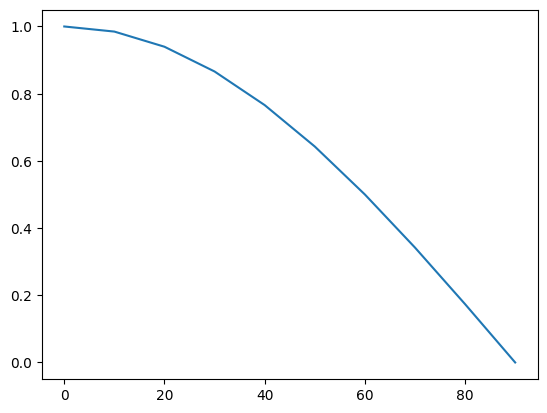

In [33]:
y = np.cos(vinkler_rad)
plt.plot(vinkler, y)

## Eksempel 6:
* Bruk `numpy` og `matplotlib` til å plotte en kurve som viser lengde på kast fra eksempel 4 som funksjon av kastevinkel.

Text(0, 0.5, 'Kastelengde i meter')

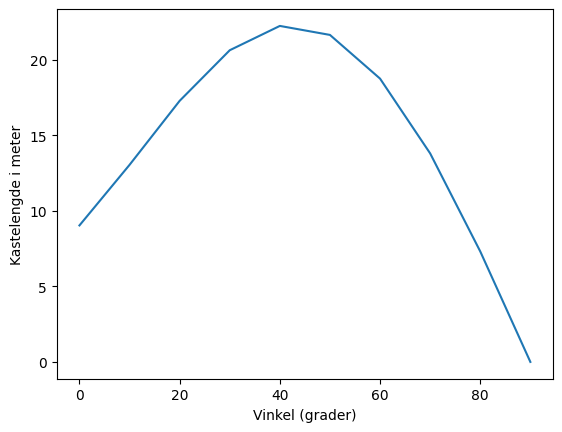

In [34]:
strekninger = beregn_ballkast(20, vinkler, 2)
plt.plot(vinkler, strekninger)
plt.xlabel("Vinkel (grader)")
plt.ylabel("Kastelengde i meter")

### Ved å inspisere plottet kan vi se at grafen har et toppunkt på ca. 40 grader.

In [48]:
delta_s = 1_000 # meter
delta_t = 41.3 - 2.0

v_avg = delta_s/delta_t
v_avg *3.6

91.60305343511452